In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df=pd.read_csv('weather_data.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


# Clean the Dataset

In [5]:
#To check if data contains null values or not so that we can clean the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [6]:
#Taking the count of null values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [7]:
df.keys()

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [8]:
df['Summary'].describe()

count              5999
unique               14
top       Partly Cloudy
freq               1791
Name: Summary, dtype: object

In [9]:
df['Precip Type'].describe()

count     5999
unique       2
top       rain
freq      4762
Name: Precip Type, dtype: object

In [10]:
df['Loud Cover'].describe()

count    5999.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Loud Cover, dtype: float64

- Since Loud Cover column has only 1 value through out so it can be dropped.
- We can also drop formatted date column as it has no use in predicting weather.

# Now Perform EDA

In [11]:
df.Summary.value_counts()

Partly Cloudy               1791
Mostly Cloudy               1473
Overcast                    1230
Clear                        853
Foggy                        576
Breezy and Overcast           25
Breezy and Mostly Cloudy      20
Breezy and Partly Cloudy       7
Breezy and Foggy               7
Humid and Mostly Cloudy        6
Windy and Overcast             4
Humid and Partly Cloudy        3
Windy and Partly Cloudy        2
Windy and Foggy                2
Name: Summary, dtype: int64

In [12]:
df1=df[['Summary', 'Precip Type', 'Temperature (C)','Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)','Pressure (millibars)', 'Daily Summary']]

In [13]:
df1.apply(np.max)

Summary                        Windy and Partly Cloudy
Precip Type                                       snow
Temperature (C)                                34.0056
Apparent Temperature (C)                          36.4
Humidity                                             1
Wind Speed (km/h)                              45.9333
Wind Bearing (degrees)                             359
Visibility (km)                                   16.1
Pressure (millibars)                           1045.14
Daily Summary               Partly cloudy until night.
dtype: object

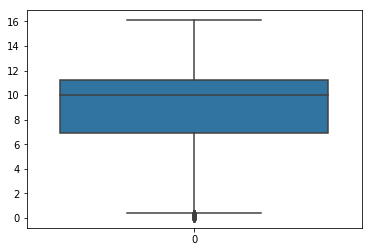

In [14]:
sns.boxplot(data=df['Visibility (km)'])

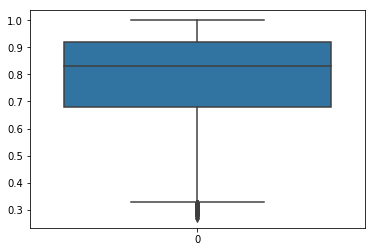

In [16]:
sns.boxplot(data=df['Humidity'])

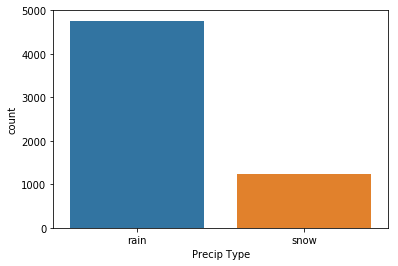

In [17]:
sns.countplot(x='Precip Type',data=df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5F0258128>,
      dtype=object)

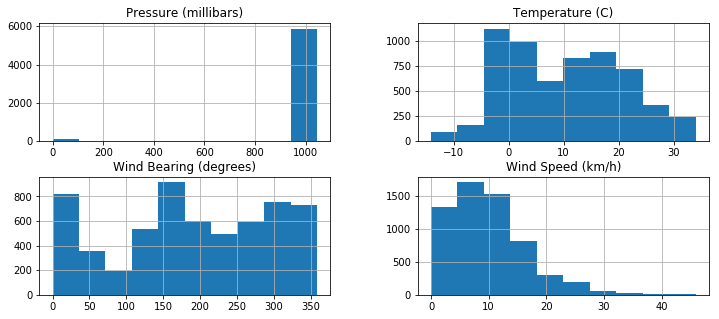

In [18]:
df1[['Wind Speed (km/h)','Wind Bearing (degrees)','Temperature (C)','Pressure (millibars)']].hist(figsize=(12,5))

# Corelation matrix

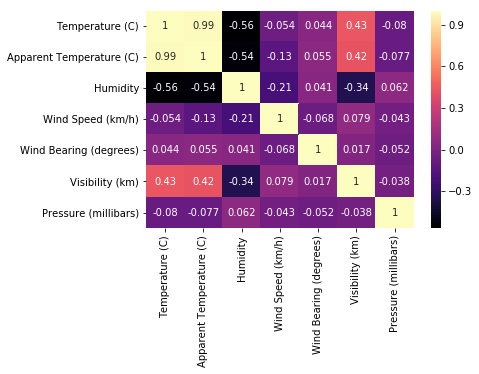

In [24]:
cor_mat=df1[df1.columns].corr()
sns.heatmap(cor_mat,annot=True , cmap ="magma")

#### Since Apparent temprature has very low correlation with

- Wind speed

- Pressure

- Wind Bearing

So we have removed these columns for linear regression.

#### We have to also remove Categorical Variables

- Summary

- Precip Type

- Daily Summary

from this dataset to perform linear regression

In [25]:
df2=df1[['Apparent Temperature (C)', 'Humidity','Visibility (km)']]

In [26]:
df2.head()

,Apparent Temperature (C),Humidity,Visibility (km)
0,7.388889,0.89,15.8263
1,7.227778,0.86,15.8263
2,9.377778,0.89,14.9569
3,5.944444,0.83,15.8263
4,6.977778,0.83,15.8263


In [27]:
X=df2[['Humidity','Visibility (km)']]
y=df2['Apparent Temperature (C)']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfp.head(10)

,Actual,Predicted
84,5.161111,10.735039
2409,1.288889,-1.622575
4997,6.077778,2.511509
346,14.144444,6.345631
79,1.633333,1.792411
994,22.177778,9.477346
4952,12.661111,-0.756068
4078,23.466667,12.579852
3940,17.711111,10.640328
1870,-0.400000,-0.280746


In [59]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  7.506893820568987
Mean Squared Error:  89.49602190914916
Root Mean Squared Error:  9.460233713241399


In [60]:
sprint(metrics.r2_score(y_test, y_pred))

0.35496309335672627
